Dataset loaded successfully.

First 10 rows of the dataset:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   
6    -122.25     37.84                52.0       2535.0           489.0   
7    -122.25     37.84                52.0       3104.0           687.0   
8    -122.26     37.84                42.0       2555.0           665.0   
9    -122.25     37.84                52.0       3549.0           707.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8

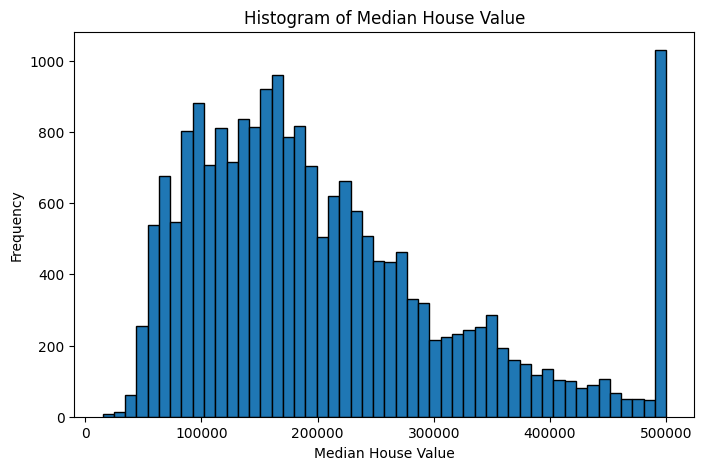

Displaying box plot of median_house_value...


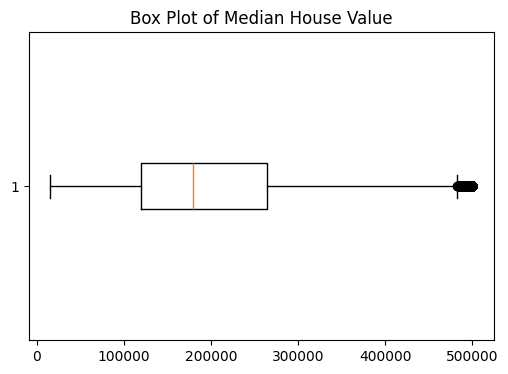

Percentage of missing values per column:
total_bedrooms    1.002907
dtype: float64 

Stratified train-test split completed.
Training set size: 16512
Test set size: 4128 

Missing values in 'total_bedrooms' handled using median imputation.

Categorical feature 'ocean_proximity' encoded using one-hot encoding.

Min-Max scaling applied to numerical features.

Correlation matrix calculated.



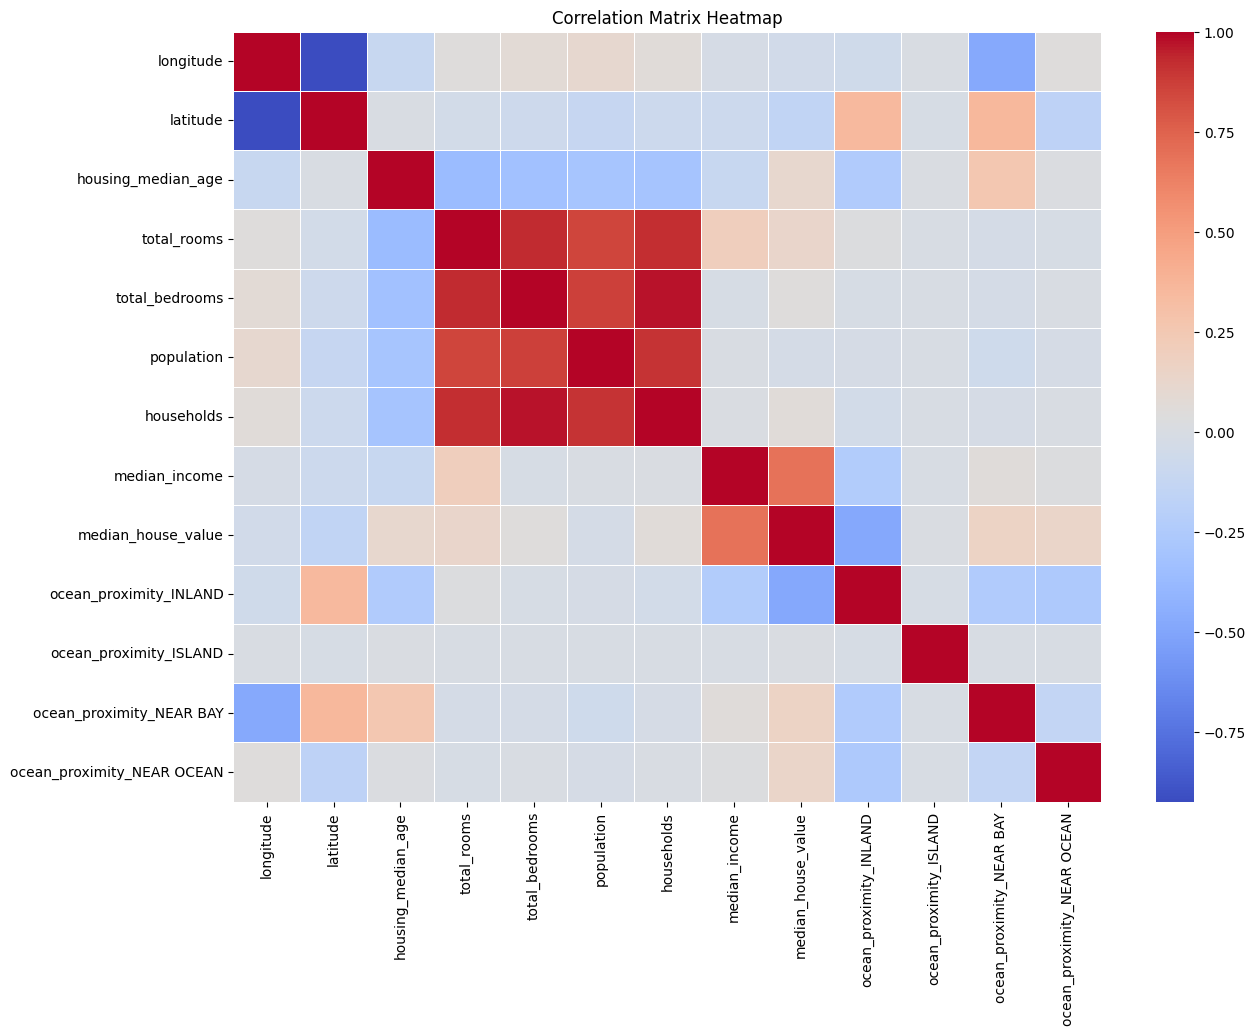

Displaying scatter plot: Median Income vs Median House Value...


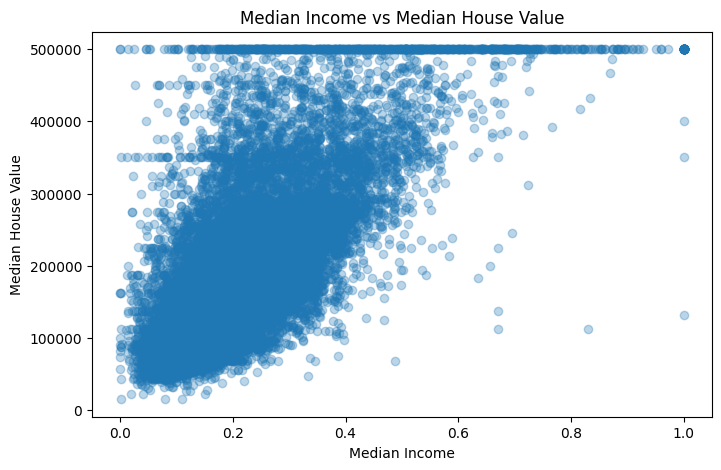

Top 3 positively correlated features with median_house_value:
median_income                 0.687151
ocean_proximity_NEAR BAY      0.158691
ocean_proximity_NEAR OCEAN    0.137332
Name: median_house_value, dtype: float64 

Most negatively correlated feature with median_house_value:
ocean_proximity_INLAND   -0.482853
Name: median_house_value, dtype: float64 

Random train-test split completed for model training.

Standard scaling applied to features.

Linear Regression model trained successfully.

Model Evaluation Metrics:
RMSE: 67589.89055226718
MAE: 49277.3384780603
R2 Score: 0.6537406712186309


In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


df = pd.read_csv("housing.csv")
print("Dataset loaded successfully.\n")


# DISPLAY FIRST 10 ROWS & DATA TYPES
print("First 10 rows of the dataset:")
print(df.head(10), "\n")

print("Data Types of each column:")
print(df.dtypes, "\n")

# BASIC STATISTICS
print("Basic statistics (Mean, Median, Std, Min, Max):")
print(df.describe().loc[['mean', '50%', 'std', 'min', 'max']], "\n")


# DISTRIBUTION OF TARGET VARIABLE
print("Displaying histogram of median_house_value...")
plt.figure(figsize=(8, 5))
plt.hist(df['median_house_value'], bins=50, edgecolor='black')
plt.xlabel("Median House Value")
plt.ylabel("Frequency")
plt.title("Histogram of Median House Value")
plt.show()

print("Displaying box plot of median_house_value...")
plt.figure(figsize=(6, 4))
plt.boxplot(df['median_house_value'], vert=False)
plt.title("Box Plot of Median House Value")
plt.show()


# MISSING VALUE ANALYSIS
missing_percent = df.isnull().mean() * 100
print("Percentage of missing values per column:")
print(missing_percent[missing_percent > 0], "\n")

# STRATIFIED SAMPLING BASED ON MEDIAN INCOME
df['income_cat'] = pd.cut(
    df['median_income'],
    bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
    labels=[1, 2, 3, 4, 5]
)

train_set, test_set = train_test_split(
    df,
    test_size=0.2,
    stratify=df['income_cat'],
    random_state=42
)

print("Stratified train-test split completed.")
print("Training set size:", len(train_set))
print("Test set size:", len(test_set), "\n")

train_set.drop('income_cat', axis=1, inplace=True)
test_set.drop('income_cat', axis=1, inplace=True)


# HANDLE MISSING VALUES (IMPUTATION)=
imputer = SimpleImputer(strategy="median")

train_set[['total_bedrooms']] = imputer.fit_transform(
    train_set[['total_bedrooms']]
)
test_set[['total_bedrooms']] = imputer.transform(
    test_set[['total_bedrooms']]
)

print("Missing values in 'total_bedrooms' handled using median imputation.\n")


# ONE-HOT ENCODING
train_set = pd.get_dummies(train_set, columns=['ocean_proximity'], drop_first=True)
test_set = pd.get_dummies(test_set, columns=['ocean_proximity'], drop_first=True)

# Align train and test columns
train_set, test_set = train_set.align(test_set, join='left', axis=1, fill_value=0)

print("Categorical feature 'ocean_proximity' encoded using one-hot encoding.\n")


# MIN-MAX SCALING (NUMERIC)
minmax_scaler = MinMaxScaler(feature_range=(0, 1))

numeric_cols = train_set.select_dtypes(include=[np.number]).drop(
    columns=['median_house_value']
).columns

train_set[numeric_cols] = minmax_scaler.fit_transform(train_set[numeric_cols])
test_set[numeric_cols] = minmax_scaler.transform(test_set[numeric_cols])

print("Min-Max scaling applied to numerical features.\n")

# CORRELATION MATRIX & HEATMAP
corr_matrix = train_set.corr()

print("Correlation matrix calculated.\n")

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

# SCATTER PLOT
print("Displaying scatter plot: Median Income vs Median House Value...")
plt.figure(figsize=(8, 5))
plt.scatter(
    train_set['median_income'],
    train_set['median_house_value'],
    alpha=0.3
)
plt.xlabel("Median Income")
plt.ylabel("Median House Value")
plt.title("Median Income vs Median House Value")
plt.show()


# FEATURE CORRELATION WITH TARGET
corr_target = corr_matrix['median_house_value'].sort_values(ascending=False)

print("Top 3 positively correlated features with median_house_value:")
print(corr_target[1:4], "\n")

print("Most negatively correlated feature with median_house_value:")
print(corr_target.tail(1), "\n")


# RANDOM TRAIN-TEST SPLIT (FOR MODELING)
X = train_set.drop('median_house_value', axis=1)
y = train_set['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Random train-test split completed for model training.\n")

# STANDARD SCALING
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Standard scaling applied to features.\n")


# LINEAR REGRESSION MODEL TRAINING
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

print("Linear Regression model trained successfully.\n")


# MODEL EVALUATION
y_pred = lin_reg.predict(X_test_scaled)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation Metrics:")
print("RMSE:", rmse)
print("MAE:", mae)
print("R2 Score:", r2)
